In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [130]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [131]:
x = df.iloc[: , :-1].values
y = df['Outcome'].values


scaler = StandardScaler()

x = scaler.fit_transform(x)

x_train, x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 2)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [133]:
x_train

array([[-0.84488505,  0.09719231,  0.25303625, ..., -0.53211885,
        -1.12311057, -0.27575966],
       [-0.84488505, -0.81042491,  0.66661825, ...,  0.38169971,
        -0.72143478,  0.83038113],
       [-1.14185152, -0.84172205,  0.04624525, ...,  1.4605133 ,
        -0.37714125, -1.04154944],
       ...,
       [ 0.04601433,  0.12848945,  0.04624525, ..., -0.39250768,
         2.02989333,  1.00055664],
       [-0.25095213, -0.15318486,  0.25303625, ..., -0.72249772,
        -1.10196973, -0.78628618],
       [ 0.04601433, -0.34096773, -0.16054575, ..., -0.01174995,
        -0.00264654, -0.36084741]])

# model building

In [134]:
from tensorflow.keras.layers import Dense
from tensorflow.keras  import Sequential

In [135]:
model = Sequential()

model.add(Dense(32 , activation = 'relu' , input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [137]:
history = model.fit(x_train , y_train , epochs = 50 , batch_size = 32 , validation_data = (x_test , y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7088 - loss: 0.6199 - val_accuracy: 0.7532 - val_loss: 0.5790
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 0.5818 - val_accuracy: 0.7597 - val_loss: 0.5557
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7239 - loss: 0.5526 - val_accuracy: 0.7792 - val_loss: 0.5394
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7391 - loss: 0.5409 - val_accuracy: 0.7792 - val_loss: 0.5261
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.5230 - val_accuracy: 0.7792 - val_loss: 0.5146
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7662 - loss: 0.4973 - val_accuracy: 0.7792 - val_loss: 0.5056
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.4962 - val_accuracy: 0.7857 - val_loss: 0.4981
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7482 - loss: 0.5021 - val_accuracy: 0.7857 - val_loss

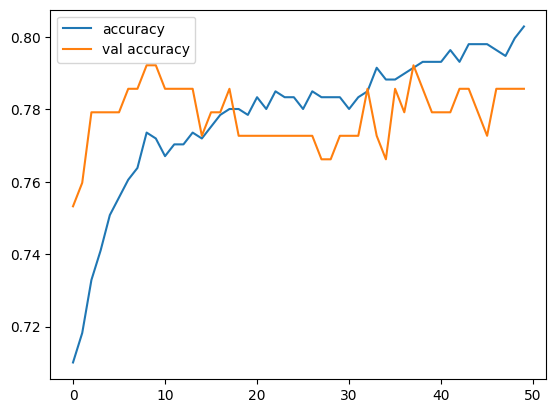

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.legend()

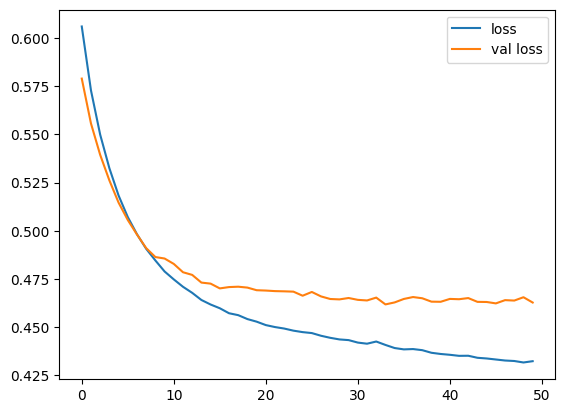

In [139]:
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()

In [140]:
model = Sequential()

model.add(Dense(32 , activation = 'relu' , input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 25 , batch_size = 32 , validation_data = (x_test , y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5258 - loss: 0.7314 - val_accuracy: 0.5455 - val_loss: 0.7073
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5892 - loss: 0.6645 - val_accuracy: 0.6169 - val_loss: 0.6484
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7183 - loss: 0.5946 - val_accuracy: 0.6688 - val_loss: 0.6055
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.5934 - val_accuracy: 0.6883 - val_loss: 0.5743
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 0.5576 - val_accuracy: 0.7078 - val_loss: 0.5515
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7505 - loss: 0.5241 - val_accuracy: 0.7273 - val_loss: 0.5315
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7455 - loss: 0.5103 - val_accuracy: 0.7338 - val_loss: 0.5179
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.5171 - val_accuracy: 0.7597 - val_loss

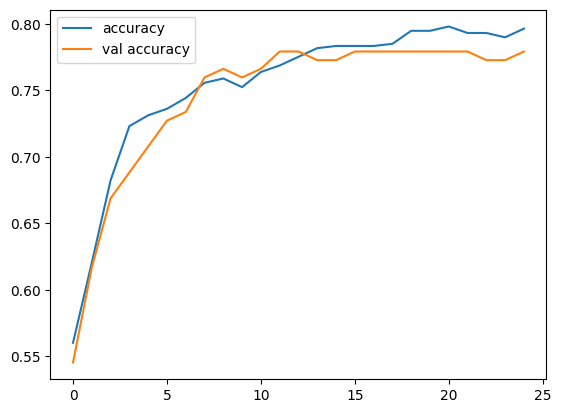

In [141]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.legend()

In [142]:
# 1. How to select approperiate optimizer
# 2. no. of nodes in layers
# 3. how to select no. of layers
# 4. all parameters tuning at once

# 1. How to select approperiate optimizer

In [143]:
pip install keras_tuner

In [144]:
import kerastuner as kt

In [145]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(32 , activation = 'relu' , input_dim = 8))
  model.add(Dense(1, activation = 'sigmoid' ))

  optimizer = hp.Choice('optimizer' , values = ['sgd' ,'adam' ,'rmsprop'])

  model.compile(optimizer = optimizer , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [146]:
tuner = kt.RandomSearch ( build_model,
            objective='val_accuracy',
            max_trials = 5,         # like cv in machine learning
            directory = 'my_dir 1',
            project_name = 'optimizer'
        )

In [147]:
tuner.search(x_train , y_train , epochs = 25 ,batch_size = 32 , validation_data = (x_test , y_test))

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 32s


In [148]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [149]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [150]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7711 - loss: 0.4787  


[0.47374671697616577, 0.7687296271324158]

above training loss and accuracy

In [152]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7853 - loss: 0.4652 


[0.46887603402137756, 0.7922077775001526]

above testing loss and accuracy

# 2. no. of nodes in layers

In [153]:
def build_model(hp):
  model = Sequential()

  units = hp.Int('untis' , min_value = 8, max_value = 128 , step = 8)

  model.add(Dense(units = units , activation = 'relu', input_dim = 8))
  model.add(Dense(1 , activation = 'sigmoid'))

  model.compile( optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [154]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory = 'my_dir 2',
                        project_name = 'num of nodes'
        )

In [155]:
tuner.search(x_train , y_train , epochs = 25 , batch_size = 32 , validation_data = (x_test , y_test))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 45s


In [156]:
tuner.get_best_hyperparameters()[0].values

{'untis': 16}

In [157]:
model = tuner.get_best_models(num_models = 1)[0]

In [158]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [159]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - loss: 0.4767  


[0.46741169691085815, 0.7752442955970764]

above training loss and accuracy

In [160]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.4779 


[0.47285500168800354, 0.7922077775001526]

above testing loss and accuracy

# 3. how to select no. of layers

In [161]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(56 , activation = 'relu' , input_dim = 8))  # just after input layer

  num_layers = hp.Int('no of layes' , min_value = 1 , max_value = 11)

  for i in range(num_layers):  # hidden layers
    model.add(Dense(56 , activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid')) # output layer

  model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [162]:
tuner = kt.RandomSearch(
              build_model,
              objective = 'val_accuracy',
              max_trials = 5,
              directory = 'my_dir 3',
              project_name = 'num layers'
        )

In [163]:
tuner.search(x_train , y_train , batch_size = 32 , epochs = 25 , validation_data = (x_test, y_test))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.7532467246055603

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 49s


In [164]:
tuner.get_best_hyperparameters()[0].values

{'no of layes': 9}

In [165]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [166]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 56)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              57 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,289 (114.41 KB)

 Trainable params: 29,289 (114.41 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7805 - loss: 0.4340  


[0.42620840668678284, 0.7866449356079102]

above traing loss and accuracy

In [168]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.4483 


[0.4473308324813843, 0.8311688303947449]

above testing loss and accuracy

# 4. all parameters tuning at once

In [169]:
def build_model(hp):
  model = Sequential()

  counter = 0

  num_layers = hp.Int('num layers' , min_value = 1 , max_value = 11)

  for i in range(num_layers):

    if counter == 0 :  # just after input layer
      model.add(Dense(units = hp.Int('units ' + str(i) , min_value = 2 , max_value = 128 , step = 2 ) , activation = hp.Choice('activation ' + str(i) , values = ['relu' ,'tanh', 'sigmoid'])  , input_dim = 8))
    else:   # other hidden layers
      model.add(Dense(units = hp.Int('units ' + str(i) , min_value = 2 , max_value = 128 , step = 2 ) , activation = hp.Choice('activation ' + str(i) , values = ['relu' ,'tanh', 'sigmoid'])))

    counter = counter + 1

  model.add(Dense(1, activation = 'sigmoid' ))

  model.compile(optimizer = hp.Choice('optimizer' , values = ['adam' , 'sgd', 'rmsprop' , 'nadam', 'adadelta']) , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [170]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy' ,
                        max_trials = 5,
                        directory = 'my dir 4',
                        project_name = 'mega tuning'
        )

Reloading Tuner from my dir 4/mega tuning/tuner0.json


In [171]:
tuner.search(x_train , y_train , batch_size = 32 , epochs = 25 , validation_data = (x_test , y_test))

In [172]:
tuner.get_best_hyperparameters()[0].values

{'num layers': 6,
 'units 0': 54,
 'activation 0': 'sigmoid',
 'optimizer': 'nadam',
 'units 1': 2,
 'activation 1': 'relu',
 'units 2': 2,
 'activation 2': 'relu',
 'units 3': 2,
 'activation 3': 'relu',
 'units 4': 2,
 'activation 4': 'relu',
 'units 5': 2,
 'activation 5': 'relu'}

In [173]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 31 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [174]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 54)                  │             486 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623 (2.43 KB)

 Trainable params: 623 (2.43 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.5905  


[0.5798757076263428, 0.7801302671432495]

above training loss and accuracy

In [176]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7702 - loss: 0.6041 


[0.6013023853302002, 0.7727272510528564]

above testing loss and accuracy